In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
pd.options.display.float_format = '{:,.2f}'.format


'''Функция построения "ящиков с усами"'''
def data_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Распределение баллов по госэкзамену по математике в зависимости от параметра ' + column)
    plt.show()

    
'''Функция проверки статистическолй разницы в распределении оценок по номинативным признакам с помощью теста Стьюдента'''
def data_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для параметра', column)
            break
    else: print('Статистически значимые различия для параметра', column, 'не найдены')
        

stud_math = pd.read_csv('stud_math.csv')

## Проверяем считываемость данных, смотрим, какие данные хранятся в файле, выводим название столбцов

In [2]:
display(stud_math.head())
stud_math.columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.00,4.00,at_home,teacher,course,mother,2.00,2.00,0.00,yes,no,no,no,yes,-6.00,yes,NaN,no,4.00,3.00,4.00,3.00,6.00,30.00
1,GP,F,17,U,GT3,NaN,1.00,1.00,at_home,other,course,father,1.00,2.00,0.00,no,yes,no,no,no,-6.00,yes,yes,no,5.00,3.00,3.00,3.00,4.00,30.00
2,GP,F,15,U,LE3,T,1.00,1.00,at_home,other,other,mother,1.00,2.00,3.00,yes,no,NaN,no,yes,-6.00,yes,yes,NaN,4.00,3.00,2.00,3.00,10.00,50.00
3,GP,F,15,U,GT3,T,4.00,2.00,health,NaN,home,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,-9.00,yes,yes,yes,3.00,2.00,2.00,5.00,2.00,75.00
4,GP,F,16,U,GT3,T,3.00,3.00,other,other,home,father,1.00,2.00,0.00,no,yes,yes,no,yes,-6.00,yes,no,no,4.00,3.00,2.00,5.00,4.00,50.00


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

## Для удобства использования частично заменям название столбцов, выводим для проверки таблицу и информацию о данных для первичного анализа

In [3]:
'''Для удобства использования частично заменям название столбцов'''
stud_math.rename(columns={'famsize': 'fam_size', 'Pstatus': 'p_status', 'Medu': 'm_edu', 'Fedu': 'f_edu', 
                 'Mjob': 'm_job', 'Fjob': 'f_job', 'traveltime': 'travel_time', 'studytime': 'study_time', 
                 'schoolsup': 'school_sup', 'famsup': 'fam_sup','studytime, granular': 'std_time_gnr', 
                 'famrel': 'fam_rel', 'freetime': 'free_time','goout': 'go_out'}, inplace=True)

In [4]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,std_time_gnr,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.00,4.00,at_home,teacher,course,mother,2.00,2.00,0.00,yes,no,no,no,yes,-6.00,yes,NaN,no,4.00,3.00,4.00,3.00,6.00,30.00
1,GP,F,17,U,GT3,NaN,1.00,1.00,at_home,other,course,father,1.00,2.00,0.00,no,yes,no,no,no,-6.00,yes,yes,no,5.00,3.00,3.00,3.00,4.00,30.00
2,GP,F,15,U,LE3,T,1.00,1.00,at_home,other,other,mother,1.00,2.00,3.00,yes,no,NaN,no,yes,-6.00,yes,yes,NaN,4.00,3.00,2.00,3.00,10.00,50.00
3,GP,F,15,U,GT3,T,4.00,2.00,health,NaN,home,mother,1.00,3.00,0.00,no,yes,yes,yes,yes,-9.00,yes,yes,yes,3.00,2.00,2.00,5.00,2.00,75.00
4,GP,F,16,U,GT3,T,3.00,3.00,other,other,home,father,1.00,2.00,0.00,no,yes,yes,no,yes,-6.00,yes,no,no,4.00,3.00,2.00,5.00,4.00,50.00
5,GP,M,16,U,LE3,T,4.00,3.00,services,other,reputation,mother,1.00,2.00,0.00,no,yes,yes,yes,yes,-6.00,yes,yes,no,5.00,4.00,2.00,5.00,10.00,75.00
6,GP,M,16,NaN,LE3,T,2.00,2.00,other,other,home,mother,1.00,2.00,0.00,no,no,no,no,yes,-6.00,yes,yes,no,4.00,4.00,4.00,3.00,0.00,55.00
7,GP,F,17,U,GT3,A,4.00,4.00,other,teacher,home,mother,2.00,2.00,0.00,yes,yes,no,no,yes,-6.00,yes,no,no,4.00,1.00,4.00,1.00,6.00,30.00
8,GP,M,15,U,LE3,A,3.00,2.00,services,other,home,mother,1.00,2.00,0.00,no,yes,yes,no,yes,-6.00,yes,yes,no,nan,2.00,2.00,1.00,0.00,95.00
9,GP,M,15,U,NaN,NaN,3.00,4.00,other,other,home,mother,1.00,2.00,0.00,no,yes,yes,yes,yes,-6.00,yes,yes,no,5.00,5.00,1.00,5.00,0.00,75.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        395 non-null    object 
 1   sex           395 non-null    object 
 2   age           395 non-null    int64  
 3   address       378 non-null    object 
 4   fam_size      368 non-null    object 
 5   p_status      350 non-null    object 
 6   m_edu         392 non-null    float64
 7   f_edu         371 non-null    float64
 8   m_job         376 non-null    object 
 9   f_job         359 non-null    object 
 10  reason        378 non-null    object 
 11  guardian      364 non-null    object 
 12  travel_time   367 non-null    float64
 13  study_time    388 non-null    float64
 14  failures      373 non-null    float64
 15  school_sup    386 non-null    object 
 16  fam_sup       356 non-null    object 
 17  paid          355 non-null    object 
 18  activities    381 non-null    

#### Таким образом, в датасете находятся записи по 395 учащимся. Датасет состоит 30 столбцов: 13 числовых и 17 строковых. Полностью заполнены только три первых столбца (школа, пол и возраст), остальные имеют пропуски
##  

## ЭТАП 1
## Анализ  количественных показателей

Количество пропущенных значений: 6


'Количественные показатели:'

50.00     54
55.00     46
0.00      37
75.00     33
65.00     31
40.00     31
60.00     31
70.00     27
45.00     27
80.00     16
30.00     15
90.00     12
35.00      9
25.00      7
85.00      6
95.00      5
100.00     1
20.00      1
Name: score, dtype: int64

'Статистические показатели:'

count   389.00
mean     52.26
std      22.92
min       0.00
25%      40.00
50%      55.00
75%      70.00
max     100.00
Name: score, dtype: float64

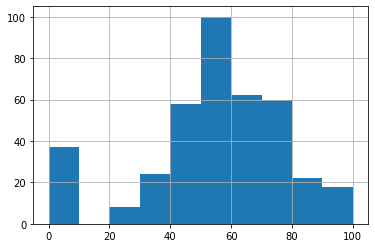

In [5]:
'''Проверка показателей параметра score (баллы по госэкзамену по математике)'''
print('Количество пропущенных значений:',stud_math.score.isnull().sum())
display('Количественные показатели:', stud_math.score.value_counts())
display('Статистические показатели:', stud_math.score.describe())
stud_math.score.hist()

### Первоначальный анализ показывает, что данные достаточно полные, имеется всего 6 пропущенных значений, выбросы отсутствуют

#### Таким образом, у 43 учеников итоговый балл по математике равен "нулю". Крайне маловероятно, что  11% учеников сдавали экзамен и получили "нулевую" оценку. Хотя бы 1 балл, но они должны были набрать (ну, не тупые же они совсем!!!). При этом мы видим, что самый "неуспешный" ученик набрал минимум 20 баллов. Если дополнительно проанализировать информацию о "нулевых" учениках, то  мы увидим, что большинство из них не пропускали занятия и хотят получить высшее образование. Из этого можно сделать вывод, что, скорее всего, данные ученики либо ещё не сдавали госэкзамен (что вероятнее всего), либо их результаты ещё не заненсены в таблицу . В любом случае, мы не должны брать данных учеников в расчёт, и они должны быть исключены из дальнейшего анализа, так как мы оцениваем влияние условий жизни учащихся на их успеваемость, а при отсутствии успеваемости данное влияние мы проверить не сможем (теряется физический смысл работы). 

### Гистограмма похожа на симметричную ("нормальную") форму распределения с выбросом в районе нуля. Однако, данный "выброс" укладывается в интервал "25% квартиль - 1,5 межквартильного расстояния" (40-(70-40)*1,5 = -5), и теоретически этот "выброс" мы должны брать в обработку. Теперь построим гистограмму успеваемости без учеников, имеющих "нулевые" оценки:

count   352.00
mean     57.76
std      16.20
min      20.00
25%      45.00
50%      55.00
75%      70.00
max     100.00
Name: score, dtype: float64

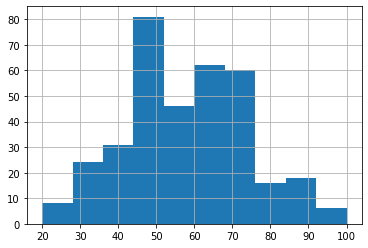

In [6]:
stud_math.score[stud_math.score>0].hist()
stud_math.score[stud_math.score>0].describe()

### Получили похожую на симметричную бимодальную форму распределения, при этом "нулевые" оценки уже выходят за рамки "percentile(25) -1.5*IQR" (45 -(70-45)**1,5 = 7,5) и могут классифицироваться, как выбросы. Данный подход не совсем корректен с точки зрения математики, однако, имеет право быть с точки зрения здравого смысла

### Посмотрим, объединяет ли что-нибудь учеников, имеющие "нулевые" отметки по математике:

In [7]:
display(stud_math[stud_math.score == 0].corr())
stud_math.loc[stud_math.score == 0]

,age,m_edu,f_edu,travel_time,study_time,failures,std_time_gnr,fam_rel,free_time,go_out,health,absences,score
age,1.00,-0.28,-0.31,-0.17,-0.04,-0.06,0.04,-0.01,0.19,0.09,-0.22,nan,nan
m_edu,-0.28,1.00,0.76,-0.14,0.14,-0.31,-0.14,-0.05,0.18,0.02,-0.10,nan,nan
f_edu,-0.31,0.76,1.00,0.01,0.24,-0.26,-0.24,-0.04,0.11,0.13,0.04,nan,nan
travel_time,-0.17,-0.14,0.01,1.00,-0.14,-0.25,0.14,-0.06,-0.07,0.05,-0.14,nan,nan
study_time,-0.04,0.14,0.24,-0.14,1.00,-0.35,-1.00,-0.10,-0.10,-0.22,-0.00,nan,nan
failures,-0.06,-0.31,-0.26,-0.25,-0.35,1.00,0.35,-0.14,0.00,0.03,0.20,nan,nan
std_time_gnr,0.04,-0.14,-0.24,0.14,-1.00,0.35,1.00,0.10,0.10,0.22,0.00,nan,nan
fam_rel,-0.01,-0.05,-0.04,-0.06,-0.10,-0.14,0.10,1.00,0.28,0.27,-0.07,nan,nan
free_time,0.19,0.18,0.11,-0.07,-0.10,0.00,0.10,0.28,1.00,0.32,-0.02,nan,nan
go_out,0.09,0.02,0.13,0.05,-0.22,0.03,0.22,0.27,0.32,1.00,-0.09,nan,nan


,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,std_time_gnr,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
128,GP,M,18,R,NaN,T,2.00,2.00,NaN,other,reputation,mother,1.00,1.00,2.00,no,yes,no,yes,yes,-3.00,yes,yes,no,3.00,3.00,3.00,4.00,0.00,0.00
130,GP,F,15,R,GT3,T,3.00,4.00,services,teacher,course,father,2.00,3.00,2.00,no,yes,no,no,yes,-9.00,yes,yes,yes,4.00,2.00,2.00,5.00,0.00,0.00
131,GP,F,15,U,GT3,NaN,1.00,1.00,at_home,other,course,mother,3.00,1.00,0.00,no,yes,no,yes,no,-3.00,yes,yes,yes,4.00,nan,3.00,4.00,0.00,0.00
134,GP,M,15,R,GT3,T,3.00,4.00,at_home,teacher,course,mother,nan,2.00,0.00,no,yes,no,no,yes,-6.00,yes,no,yes,5.00,3.00,3.00,5.00,0.00,0.00
135,GP,F,15,U,GT3,T,4.00,4.00,services,NaN,course,mother,1.00,3.00,0.00,no,yes,no,yes,yes,-9.00,yes,yes,yes,4.00,3.00,3.00,5.00,0.00,0.00
136,GP,M,17,R,GT3,T,3.00,4.00,at_home,other,course,mother,3.00,2.00,0.00,no,no,NaN,no,yes,-6.00,yes,no,no,nan,4.00,5.00,5.00,0.00,0.00
137,GP,F,16,U,GT3,A,3.00,nan,other,other,NaN,other,nan,1.00,2.00,no,yes,no,yes,no,-3.00,yes,yes,yes,4.00,3.00,2.00,5.00,0.00,0.00
140,GP,M,15,U,GT3,T,4.00,3.00,teacher,services,NaN,father,2.00,4.00,0.00,yes,yes,no,NaN,yes,-12.00,yes,yes,no,2.00,2.00,2.00,3.00,0.00,0.00
144,GP,M,17,U,GT3,T,2.00,1.00,other,other,home,NaN,1.00,1.00,3.00,no,yes,no,no,yes,-3.00,yes,yes,no,5.00,4.00,5.00,5.00,0.00,0.00
146,GP,F,15,U,GT3,T,3.00,2.00,health,services,home,father,1.00,2.00,3.00,no,NaN,no,no,yes,-6.00,yes,yes,no,3.00,3.00,2.00,3.00,0.00,0.00


### Исходя из этой таблицы, возраст, пол и прочие условия жизни у учеников совершенно разные. Их может объединять только отсутствие дополнительной образовательной поддержки

### Исключаем из датасета записи с учениками, имеющими "нулевые" и пропущенные оценки по матаематике:

In [8]:
stud_math = stud_math.loc[stud_math.score > 0]

### Проверяем другие количественные показатели

'Количественные показатели:'

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

'Статистические показатели:'

count   352.00
mean     16.63
std       1.26
min      15.00
25%      16.00
50%      17.00
75%      18.00
max      22.00
Name: age, dtype: float64

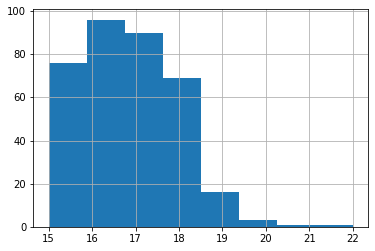

In [9]:
'''Проверка показателей параметра age(возраст учеников)'''
display('Количественные показатели:',stud_math.age.value_counts())
stud_math.age.hist(bins = 8)
stat_age = stud_math.age.describe()
display('Статистические показатели:', stat_age)

#### Предварительный анализ показывает, что данные заполнены полностью, гистограмма распределения нормальна с возможными выбросами в районе 21-22 лет.
### Проверяем данные на предмет выбросов:

In [10]:
print('25-й перцентиль: {},'.format(stat_age[4]), '75-й перцентиль: {},'.format(stat_age[6]), 
      "IQR: {}, ".format(stat_age[6]-stat_age[4]),"Границы выбросов: [{}, {}].".format(stat_age[4] - 
                                                                        1.5*(stat_age[6]-stat_age[4]), 
                                                                        stat_age[6] + 1.5*(stat_age[6]-stat_age[4])))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


#### Таким образом, все возрасты учеников, за исключением 22-х лет, попадают в допустимый диапазон. Однако, ученик в возрасте 22 года всего один, и мы не будем исключать его из анализа
### Вывод: данные в столбце age полные, без существенных выбросов, дополнительная обработка не требуется

Количество пропущенных значений: 2


'Количественные показатели:'

4.00    125
2.00     88
3.00     87
1.00     47
0.00      3
Name: m_edu, dtype: int64

'Статистические показатели:'

count   350.00
mean      2.81
std       1.09
min       0.00
25%       2.00
50%       3.00
75%       4.00
max       4.00
Name: m_edu, dtype: float64

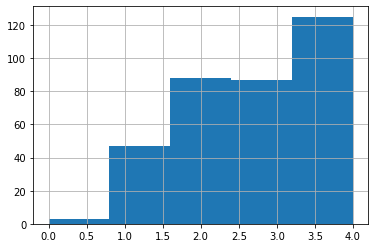

In [11]:
'''Проверка показателей параметра medu (образование матери)'''
print('Количество пропущенных значений:',stud_math.m_edu.isnull().sum())
display('Количественные показатели:',stud_math.m_edu.value_counts())
display('Статистические показатели:', stud_math.m_edu.describe())
stud_math.m_edu.hist(bins=5)

#### Похоже на линейную зависимость: количество пропорционально качеству образования
### Первичный анализ показывает, что матерей, имеющих высшее образование, большее количество, при этом матерей, имеющих начальное и среднее образование, примерно поровну. Без образования практически нет. 
### Данные в столбце medu практически полные, без существенных выбросов. Пропущенных значений 2, для удобства приравняем их нулю:

In [12]:
stud_math.m_edu.fillna(float(0), inplace=True)

Количество пропущенных значений: 21


'Количественные показатели:'

2.00     94
3.00     89
4.00     80
1.00     65
0.00      2
40.00     1
Name: f_edu, dtype: int64

'Статистические показатели:'

count   331.00
mean      2.66
std       2.32
min       0.00
25%       2.00
50%       3.00
75%       3.00
max      40.00
Name: f_edu, dtype: float64

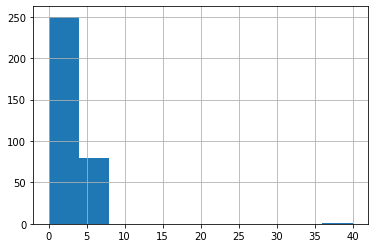

In [13]:
'''Проверка показателей параметра fedu (образование отца)'''
print('Количество пропущенных значений:', stud_math.f_edu.isnull().sum())
display('Количественные показатели:', stud_math.f_edu.value_counts()) 
display('Статистические показатели:', stud_math.f_edu.describe())
stud_math.f_edu.hist()

### Выводы: 
#### - отцов, имеющих высшее, среднее и неполное среднее образования, примерно одинаковое количество. Без образования практически нет
#### - пропущенных значений 21, заполнить их не представляется возможным ввиду большого количества и отсутствия информации
#### - имеется один выброс, равный 40. Вероятно, это ошибка при заведении данных, скорее всего, хотели завести 4
### Исправляем:

In [14]:
stud_math.f_edu[stud_math.f_edu == 40] = 4

'Количественные показатели:'

2.00    94
3.00    89
4.00    81
1.00    65
0.00     2
Name: f_edu, dtype: int64

count   331.00
mean      2.55
std       1.08
min       0.00
25%       2.00
50%       3.00
75%       3.00
max       4.00
Name: f_edu, dtype: float64

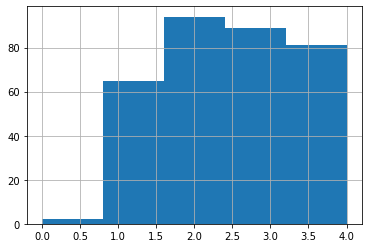

In [15]:
'''Проверяем...'''
display('Количественные показатели:', stud_math.f_edu.value_counts()) 
stud_math.f_edu.hist(bins=5)
stud_math.f_edu.describe()

#### Гистограмма похожа на нормальное распределение с небольшим смещением влево
#  

Количество пропущенных значений: 23


'Количественные показатели:'

1.00    219
2.00     86
3.00     17
4.00      7
Name: travel_time, dtype: int64

'Статистические показатели:'

count   329.00
mean      1.43
std       0.69
min       1.00
25%       1.00
50%       1.00
75%       2.00
max       4.00
Name: travel_time, dtype: float64

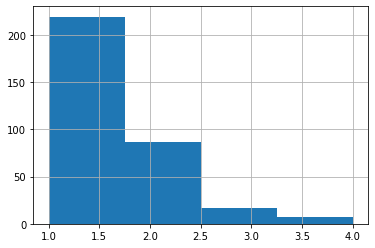

In [16]:
'''Проверка показателей параметра traveltime (время на дорогу)'''
print('Количество пропущенных значений:',stud_math.travel_time.isnull().sum())
display('Количественные показатели:', stud_math.travel_time.value_counts())
display('Статистические показатели:', stud_math.travel_time.describe())
stud_math.travel_time.hist(bins=4)

#### Похоже на экспоненту: функция количества учеников обратно пропорциональна квадрату (или кубу) времени на дорогу
### Выводы: 
#### - почти 60% учеников живут в непосредственной близости от школы, и только 7% учеников тратят на дорогу более 30 минут. Очевидно, что близость школы от дома - один из главных критериев при выборе школы
#### - пропущенных значений 23, заполнить их не представляется возможным ввиду большого количества и отсутствия информации
#### - выбросы отсутствуют, данные дополнительной обработки не требуют
##  

Количество пропущенных значений: 7


'Количественные показатели:'

2.00    173
1.00     90
3.00     58
4.00     24
Name: study_time, dtype: int64

'Статистические показатели:'

count   345.00
mean      2.05
std       0.84
min       1.00
25%       1.00
50%       2.00
75%       2.00
max       4.00
Name: study_time, dtype: float64

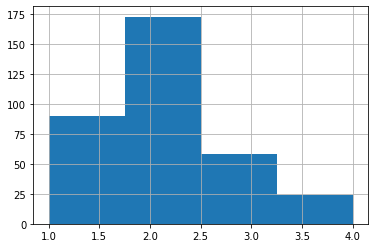

In [17]:
'''Проверка показателей параметра studytime (время на учёбу помимо школы)'''
print('Количество пропущенных значений:',stud_math.study_time.isnull().sum())
display('Количественные показатели:', stud_math.study_time.value_counts())
display('Статистические показатели:', stud_math.study_time.describe())
stud_math.study_time.hist(bins=4)

### Выводы: 
#### - данные достаточно полные (пропущенных значений всего 7), выбросы отсутствуют, дополнительной обработки данных не требуется
#### - 50% учеников тратят на учебу помимо школы 2-5 часов, при этом немало и учеников (порядка 25%), которые на учёбу тратят менее 2 часов
##  

Количество пропущенных значений: 7


'Количественные показатели:'

-6.00     173
-3.00      90
-9.00      58
-12.00     24
Name: std_time_gnr, dtype: int64

'Статистические показатели:'

count   345.00
mean     -6.14
std       2.52
min     -12.00
25%      -6.00
50%      -6.00
75%      -3.00
max      -3.00
Name: std_time_gnr, dtype: float64

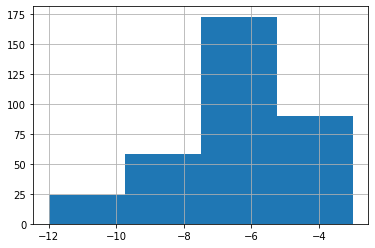

In [18]:
'''Проверка параметров показателя studytime,granular'''
print('Количество пропущенных значений:',stud_math.std_time_gnr.isnull().sum())
display('Количественные показатели:', stud_math.std_time_gnr.value_counts())
display('Статистические показатели:', stud_math.std_time_gnr.describe())
stud_math.std_time_gnr.hist(bins=4)

### Выводы: 
#### данные достаточно полные (пропущенных значений всего 7), выбросы отсутствуют, дополнительной обработки данных не требуется
#### гистограмма распределения и количественные характеристики очень похожи на данные параметра studytime (проведем их анализ чуть позже)
##  

Количество пропущенных значений: 20


'Количественные показатели:'

0.00    273
1.00     38
2.00     11
3.00     10
Name: failures, dtype: int64

'Статистические показатели:'

count   332.00
mean      0.27
std       0.67
min       0.00
25%       0.00
50%       0.00
75%       0.00
max       3.00
Name: failures, dtype: float64

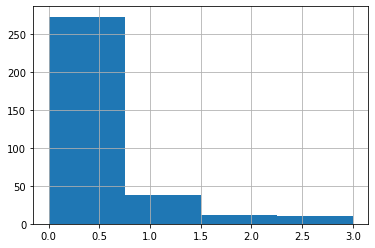

In [19]:
'''Проверка параметра failures (внеучебные неудачи)'''
print('Количество пропущенных значений:',stud_math.failures.isnull().sum())
display('Количественные показатели:', stud_math.failures.value_counts())
display('Статистические показатели:', stud_math.failures.describe())
stud_math.failures.hist(bins=4)

#### Похоже на экспоненту: количество учеников, имеющих внеучебные неудачи, обратно пропорционально квадрату (или кубу) количества самих внеучебных неудач
### Незаполненных позиций 20, заполнить их не представляется возможным ввиду отсутствия информации
### Выбросы отсутствуют, данные дополнительной обработки не требуют
##  

Количество пропущенных значений: 24


'Количественные показатели:'

4.00     163
5.00      88
3.00      56
2.00      14
1.00       6
-1.00      1
Name: fam_rel, dtype: int64

'Статистические показатели:'

count   328.00
mean      3.94
std       0.92
min      -1.00
25%       4.00
50%       4.00
75%       5.00
max       5.00
Name: fam_rel, dtype: float64

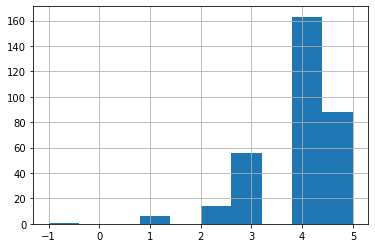

In [20]:
'''Проверка параметра famrel (семейные отношения)'''
print('Количество пропущенных значений:',stud_math.fam_rel.isnull().sum())
display('Количественные показатели:', stud_math.fam_rel.value_counts())
display('Статистические показатели:', stud_math.fam_rel.describe())
stud_math.fam_rel.hist()

### Выводы: 
### - ученики в-основном из благополучных семей, количество учеников из семей с отношеними "ниже среднего" составляет всего 6%
### - количество пропущенных значений 24, заполнить их не представляется возможным ввиду отсутствия информации. 
### - имеется один очевидный выброс, который находится за пределами допустимых значений (от 1 до 5)
## Делаем его NaN:

In [21]:
stud_math.loc[stud_math.fam_rel == -1] = np.nan

'Статистические показатели:'

count   327.00
mean      3.96
std       0.88
min       1.00
25%       4.00
50%       4.00
75%       5.00
max       5.00
Name: fam_rel, dtype: float64

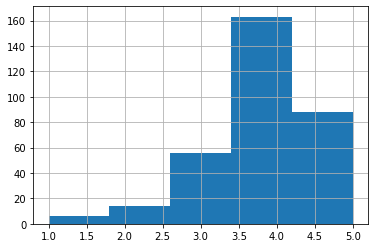

In [22]:
'''Проверяем:...'''
stud_math.fam_rel.hist(bins=5)
display('Статистические показатели:', stud_math.fam_rel.describe())

#### Таким образом, получили смещенный слегка влево нормальный закон распределения
##  

Количество пропущенных значений: 9


'Количественные показатели:'

3.00    132
4.00    102
2.00     58
5.00     35
1.00     16
Name: free_time, dtype: int64

'Статистические показатели:'

count   343.00
mean      3.24
std       1.00
min       1.00
25%       3.00
50%       3.00
75%       4.00
max       5.00
Name: free_time, dtype: float64

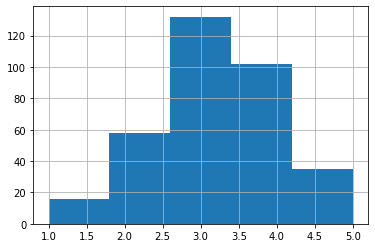

In [23]:
'''Проверка параметра "Свободное время после школы", freetime '''
print('Количество пропущенных значений:',stud_math.free_time.isnull().sum())
display('Количественные показатели:', stud_math.free_time.value_counts())
display('Статистические показатели:', stud_math.free_time.describe())
stud_math.free_time.hist(bins=5)

### Выводы: 
### - данные в столбце достаточно чистые, выбросов нет, количество пропущенных значений всего 9
### - нормальное распределение данных с небольшим смещением "вправо"
### - дополнительной обработки данных не требуется
##  

Количество пропущенных значений: 7


'Количественные показатели:'

3.00    118
2.00     91
4.00     74
5.00     43
1.00     19
Name: go_out, dtype: int64

'Статистические показатели:'

count   345.00
mean      3.09
std       1.09
min       1.00
25%       2.00
50%       3.00
75%       4.00
max       5.00
Name: go_out, dtype: float64

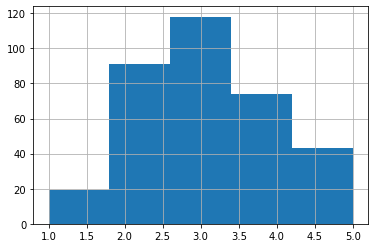

In [24]:
'''Проверка параметра goout (проведение времени с друзьями)'''
print('Количество пропущенных значений:',stud_math.go_out.isnull().sum())
display('Количественные показатели:', stud_math.go_out.value_counts())
display('Статистические показатели:', stud_math.go_out.describe())
stud_math.go_out.hist(bins=5)

### Выводы: 
#### - данные в столбце достаточно чистые, выбросов нет, количество пропущенных значений всего 7
#### - нормальное распределение с небольшим смещением "вправо"
#### - дополнительной обработки данных не требуется
##  

Количество пропущенных значений: 14


'Количественные показатели:'

5.00    123
3.00     81
4.00     53
1.00     45
2.00     36
Name: health, dtype: int64

'Статистические показатели:'

count   338.00
mean      3.51
std       1.41
min       1.00
25%       3.00
50%       4.00
75%       5.00
max       5.00
Name: health, dtype: float64

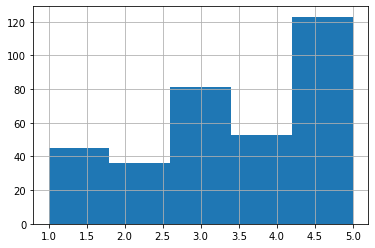

In [25]:
'''Проверка параметра health (здоровье)'''
print('Количество пропущенных значений:',stud_math.health.isnull().sum())
display('Количественные показатели:', stud_math.health.value_counts())
display('Статистические показатели:', stud_math.health.describe())
stud_math.health.hist(bins=5)

### Выводы: 
#### - гистограмма похожа на линейный закон распределения данных
#### - данные в столбце достаточно чистые, выбросов нет, количество пропущенных значений всего 14
#### - достаточно много учеников (около 25%) с состоянием здоровья "ниже среднего"
#### - дополнительной обработки данных не требуется
##  

Количество пропущенных значений: 11


'Количественные показатели:'

0.00      74
2.00      60
4.00      52
6.00      30
8.00      20
10.00     17
12.00     12
14.00     11
3.00       7
16.00      7
7.00       6
18.00      5
5.00       5
20.00      4
22.00      3
9.00       3
1.00       3
15.00      2
13.00      2
11.00      2
25.00      1
54.00      1
385.00     1
26.00      1
56.00      1
24.00      1
212.00     1
21.00      1
75.00      1
30.00      1
19.00      1
38.00      1
40.00      1
23.00      1
17.00      1
28.00      1
Name: absences, dtype: int64

'Статистические показатели:'

count   341.00
mean      8.07
std      24.74
min       0.00
25%       2.00
50%       4.00
75%       8.00
max     385.00
Name: absences, dtype: float64

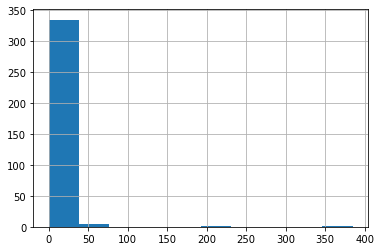

In [26]:
'''Проверка параметра absences (количество пропущенных занятий)'''
print('Количество пропущенных значений:',stud_math.absences.isnull().sum())
display('Количественные показатели:', stud_math.absences.value_counts())
stat_abss = stud_math.absences.describe()
display('Статистические показатели:', stat_abss)
stud_math.absences.hist()

### Предварительный анализ: данные достаточно полные, пропущенных значений всего 7, имеются выбросы
### Рассчитаем границы выбросов и осуществим фильтрацию значений:

In [27]:
print('25-й перцентиль: {},'.format(stat_abss[4]), '75-й перцентиль: {},'.format(stat_abss[6]), 
      "IQR: {}, ".format(stat_abss[6]-stat_abss[4]),"Границы выбросов: [{}, {}].".format(stat_abss[4] - 
                                                                            1.5*(stat_abss[6]-stat_abss[4]), 
                                                                            stat_abss[6] + 1.5*(stat_abss[6]-stat_abss[4])))

25-й перцентиль: 2.0, 75-й перцентиль: 8.0, IQR: 6.0,  Границы выбросов: [-7.0, 17.0].


### Вывод: все значения параметра укладываются в нижнюю границу выбросов, за пределами верхней границы находится 27 записей (порядка 8% значений)
### Исключаем их из обработки:

Исключенных из обработки записей: 27


'Количественные показатели:'

0.00     74
2.00     60
4.00     52
6.00     30
8.00     20
10.00    17
12.00    12
14.00    11
16.00     7
3.00      7
7.00      6
5.00      5
1.00      3
9.00      3
11.00     2
13.00     2
15.00     2
17.00     1
Name: absences, dtype: int64

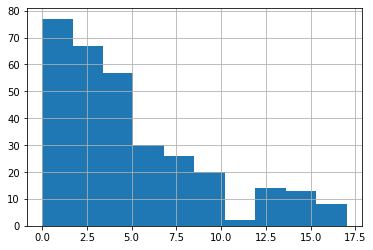

In [28]:
print('Исключенных из обработки записей:', stud_math.absences[stud_math.absences > 17].count())
stud_math = stud_math.loc[stud_math.absences < 18]
stud_math.absences.hist()
display('Количественные показатели:', stud_math.absences.value_counts())

#### Таким образом, у нас получилась гистограмма с линейным (или квадратичным) обратным распределением. При этом для дальнейшего анализа у нас остались в-основном записи, повторяющиеся не менее одного раза (число прогулов два и более)
##  

### Проведём корреляционный анализ столбцов с числовыми данными:

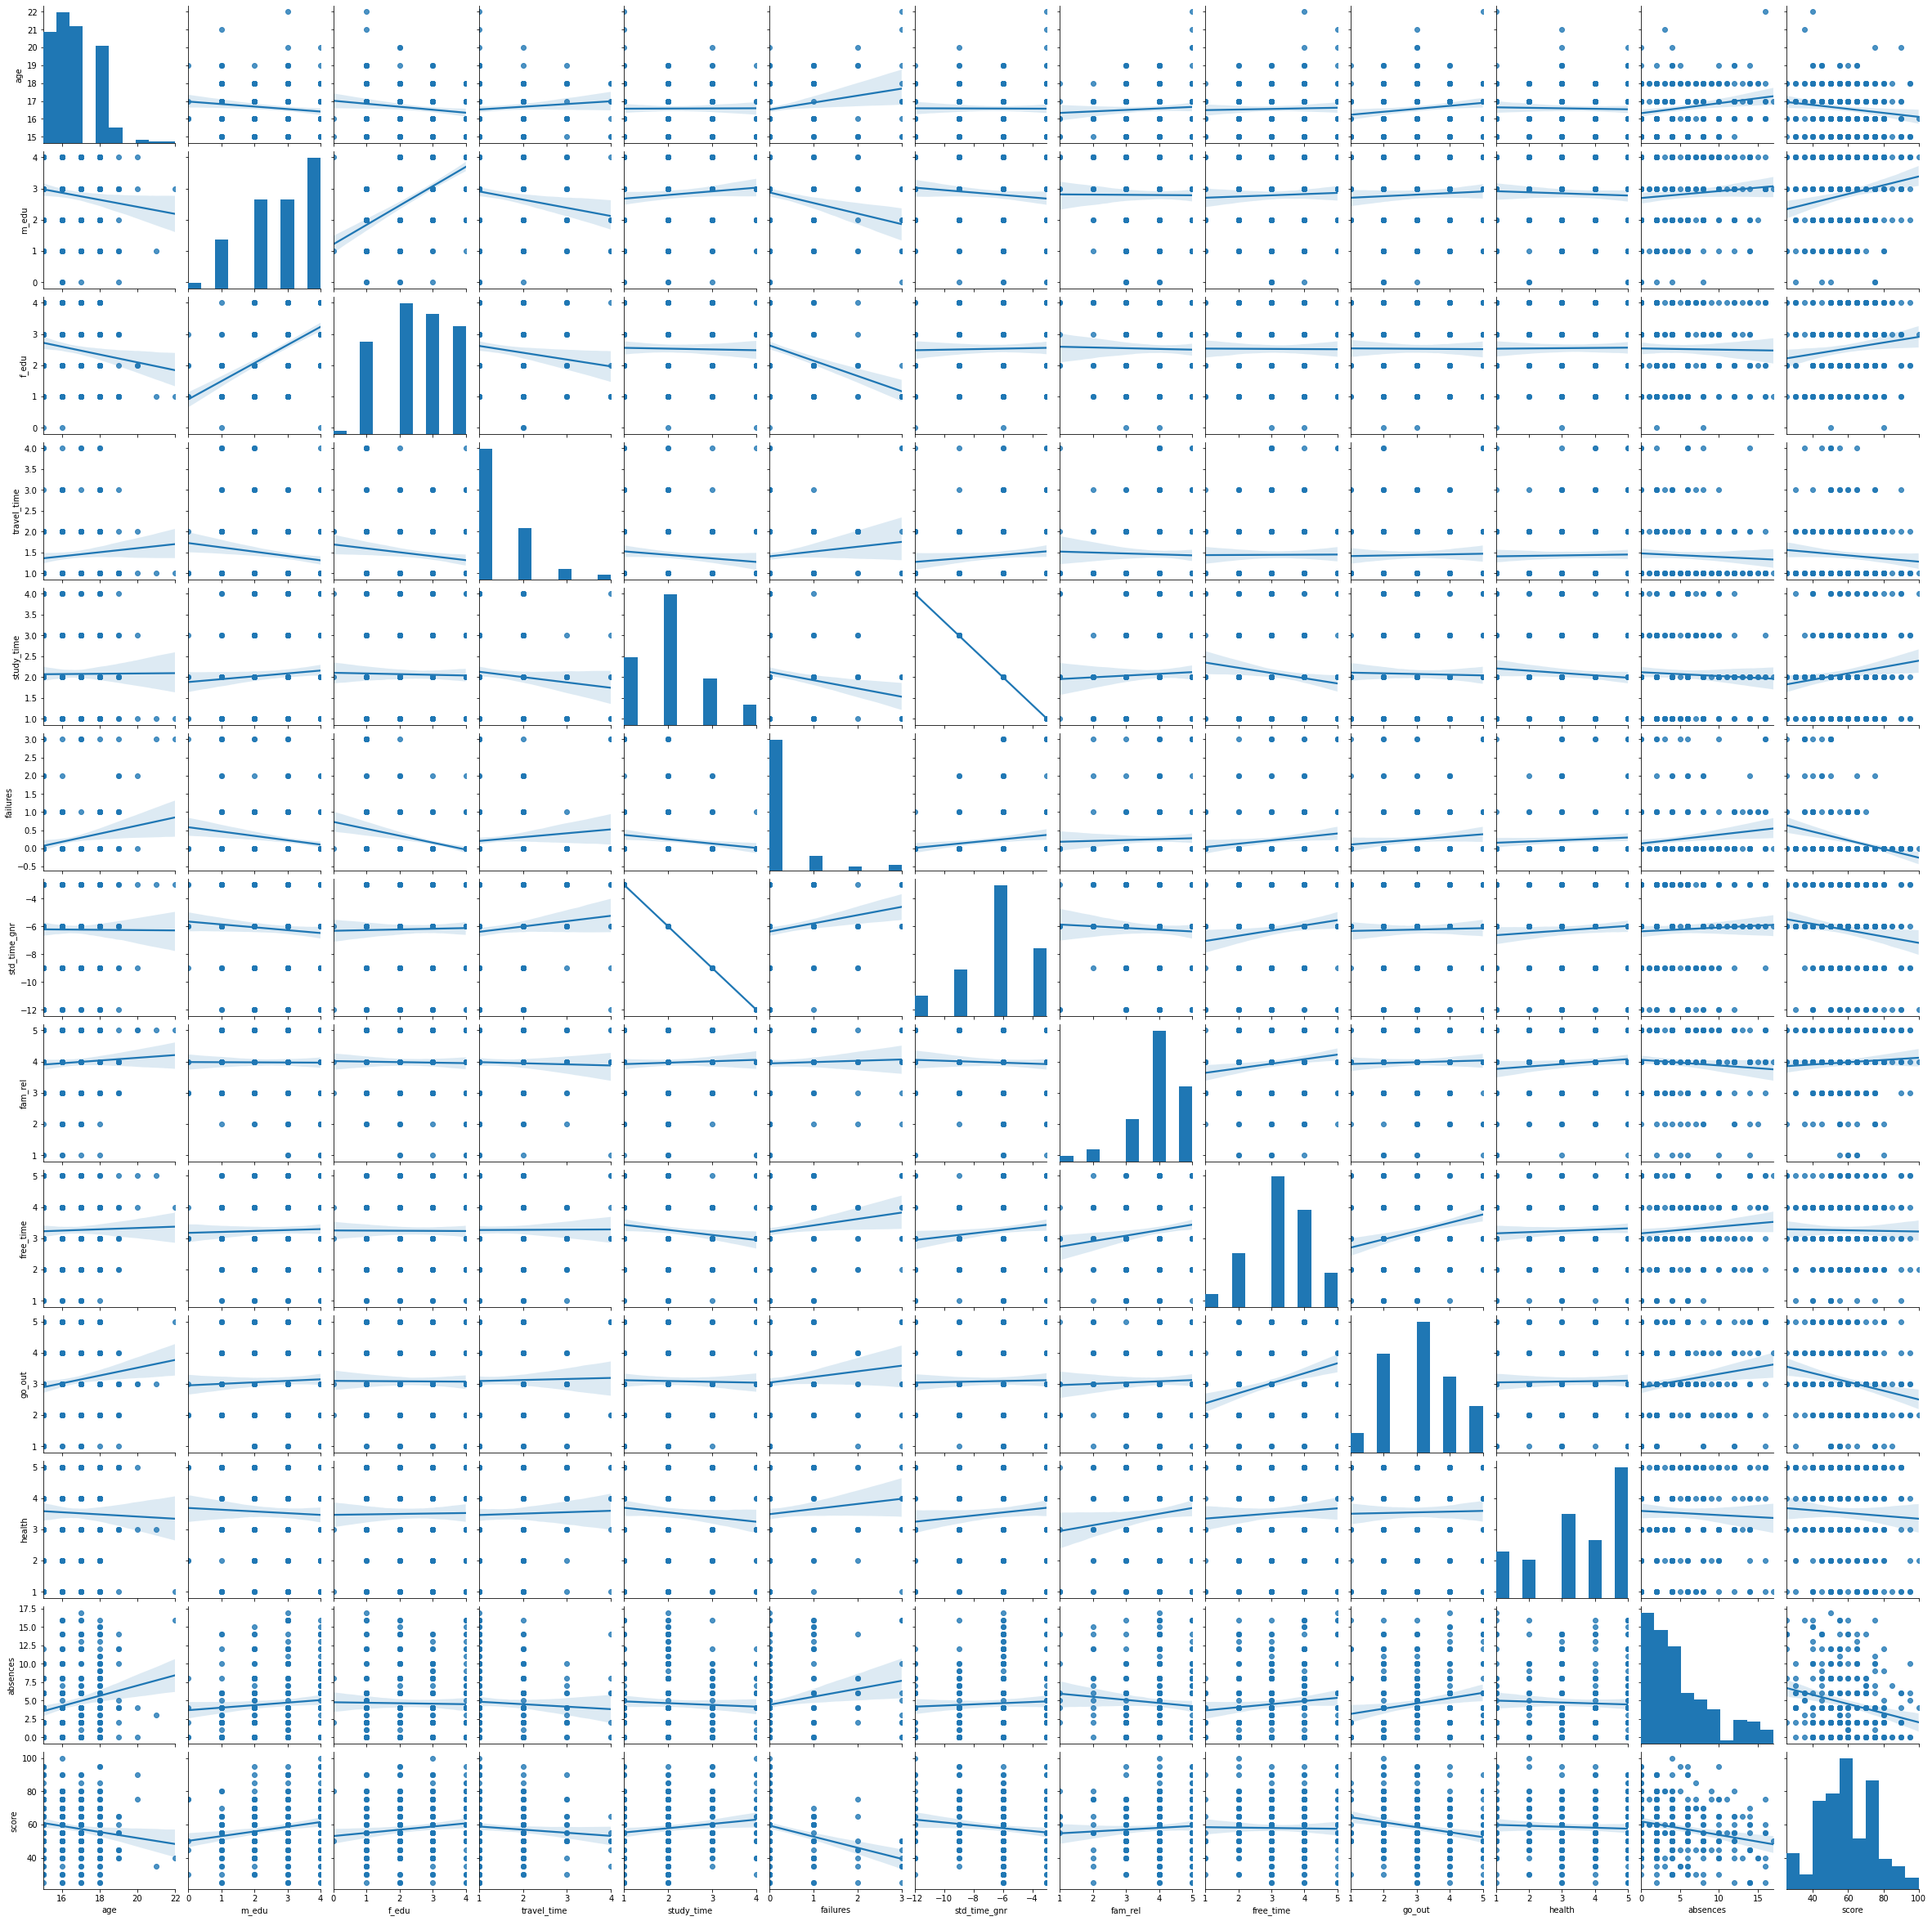

In [29]:
sns.pairplot(stud_math, kind = 'reg')

In [30]:
stud_math.corr()

,age,m_edu,f_edu,travel_time,study_time,failures,std_time_gnr,fam_rel,free_time,go_out,health,absences,score
age,1.00,-0.13,-0.15,0.09,0.01,0.21,-0.01,0.06,0.03,0.14,-0.03,0.20,-0.14
m_edu,-0.13,1.00,0.60,-0.17,0.09,-0.20,-0.09,-0.01,0.03,0.05,-0.04,0.09,0.20
f_edu,-0.15,0.60,1.00,-0.14,-0.02,-0.31,0.02,-0.02,-0.01,-0.01,0.01,-0.02,0.13
travel_time,0.09,-0.17,-0.14,1.00,-0.10,0.11,0.10,-0.03,0.00,0.02,0.02,-0.05,-0.08
study_time,0.01,0.09,-0.02,-0.10,1.00,-0.15,-1.00,0.04,-0.14,-0.02,-0.09,-0.05,0.14
failures,0.21,-0.20,-0.31,0.11,-0.15,1.00,0.15,0.03,0.14,0.11,0.08,0.16,-0.28
std_time_gnr,-0.01,-0.09,0.02,0.10,-1.00,0.15,1.00,-0.04,0.14,0.02,0.09,0.05,-0.14
fam_rel,0.06,-0.01,-0.02,-0.03,0.04,0.03,-0.04,1.00,0.16,0.03,0.12,-0.09,0.06
free_time,0.03,0.03,-0.01,0.00,-0.14,0.14,0.14,0.16,1.00,0.29,0.06,0.10,-0.02
go_out,0.14,0.05,-0.01,0.02,-0.02,0.11,0.02,0.03,0.29,1.00,0.02,0.18,-0.20


### Какие основные выводы можно сделать из полученной корреляционной матрицы?
#### 1. Наблюдается полная обратная корреляционная зависимость между двумя параметрами: studytime и studytime,granular: количественные показатели у обоих абсолютно одинаковые, включая количество пропущенных значений, отличаются только соответствующие качественные показатели. В параметре study_time они равны 1, 2, 3, 4, в параметре же study_time,granular -3, -6, -9, -12 соответственно, т.е. study_time,granular равен study_time, умноженному на минус 3. По сути параметры studytime и studytime,granular являются одинаковыми, только имеют различные обозначения.Один из этих параметров мы можем исключить из дальнейшего анализа, им будет studytime,granular.
#### 2. На итоговую оценку по математике (score) наибольшее влияние оказывает 7 числовых параметров:
#### - возраст ученика (age): чем меньше возраст, тем легче даётся наука;
#### - образование родителей (m_edu, f_edu): чем образованнее родители, тем лучше успеваемость учеников. Очевидно, что родители с высшим образованием могут обеспечить гораздо лучшую интеллектуальную поддержку и помощь своему ребёнку;
#### - время, которое дополнительно тратит ученик на обучение (study_time): чем больше это время, тем лучше успехи (логично, не правда ли?)
#### - внеучебные неудачи (failures	) (внимание: наибольшее вляние!!!): чем больше неудач, чем хуже успеваемость (до учёбы ли, если другие проблемы не дают сосредоточиться на учёбе!)
#### - проведение времени с друзьями (go_out): друзья постоянно отвлекают от учёбы (особенно двоечники), то погулять сходить, то музыку послушать, то на тусовку срочно надо, то пивка попить и прочее, прочее, прочее... Когда тут учиться?
#### - количество пропущенных занятий (absences): чем меньше пропущенных занятий, тем лучше результат. Странно, не правда ли ? :)
#### 3. Ряд параметров на оценку по госэкзамену по математике практически не влияет. Это: время в пути до школы (travel_time), семейные отношения (fam_rel), свободное время после школы (free_time) и состояние здоровья (health). Эти данные я бы исключил из дальнейшего анализа, как несущественные.
### Проанализируем дополнительно взаимосвязь между параметрами (столбцами):
#### 1. Возраст ученика: 
#### - сильная обратная корреляция с образованием родителей может говорить о том, что решение родителей о создании семьи и рождении детей  принималось в зависимости от окончания образования
#### - с возрастом у ученика всё больше всё больше возникает вероятность наделать глупостей (failures) (родителей мы уже не слушаемся, взрослые же !!!, пытаемся жить своим умом, а жизненного опыта не хватает)
#### - чем старше ученик, тем меньше ему хочется учиться и больше времени хочется проводить с друзьями, отсюда и прогулы занятий (absences), и жизненные неурядицы (failures), и, как результат, не очень хорошие итоговые оценки
#### 2. Образование родителей (medu и fedu): 
#### - наблюдается сильная корреляция между этими двумя параметрами. Данный момент можно объяснить тем, что супружеские пары подбираются, как правило, по общности вкусов, интересов, взглядов, в том числе и уровню образования
#### - обратная корреляционная зависимость между образованием родителей и временем ученика на дорогу до школы может объясняться тем, что более образованные родители имеют более высокооплачиваемую работу и, соответственно, более высокое благосотояние, что позволяет ученику использовать для перемещения между домом и школой личный автотранспорт (аемейные машины, такси), а не ходить пешком или пользоваться общественным транспортом
#### - прослеживавется устойчивая взаимосвязь между образованием родителей (medu и fedu) и вероятностью попадания ученика в неприятную ситуацию (failures). Образованные интеллектуальные родители сами не создадут и не вляпаются в неприятную ситуацию, и своего ребёнка оградят от неё. Примером и советом. 
#### 3. Время на дорогу (travel_time): прямая корреляционная связь с количеством внеучебных неудач (failures) может объясняться тем, что в дороге человека окружает множество людей, ученик оказывается в сосвершенно различных ситуациях, и вероятность попасть в какую-либо неприятную ситуацию сильно возрастает
#### 4. Время на учёбу помимо школы (study_time): дополнительное увеличение времени на учёбу совершенно логически уменьшает количество времени после школы (free_time), количество внеучебных неудач (failures) (становится просто некогда попадать в неприятную ситуацию
#### 5. Количество внеучебных неудач (failures): при наличии большого количества свободного времени (free_time) его всегда хочется провести как-то интересно, отсюда поиск приключений и, как результат, более высокая вероятность попадания в неприятную ситуацию. А с друзьями таких приключений ещё больше!!! Когда неприятности, какие могут быть уроки (absences)?
#### 6. При хороших семейных отношениях (fam_rel) хочется больше времени проводить в семейном кругу (free_time), а не искать приключения с друзьями (go_out). Спокойная доброжелательная семейная обстановка, отсутствие неприятностей (failures) вполне логично сказываются на общем состоянии здоровья (health).
#### 7. Видна сильная взаимосвязь между параметрами freetime и goout (свободным временем учеников и времени, проведенном с друзьями), что вполне логично. При этом, наличие свободного времени, в отличие от общения с друзьями, практически не оказывает влияния на успеваемость учащихся.


In [31]:
'''Исключаем параметр std_time_gnr (studytime,granular) из дальнейшего анализа'''
stud_math.drop(['std_time_gnr'], inplace = True, axis = 1)

## ЭТАП 2
## Анализ номинативных показателей

'Количественные показатели:'

GP    275
MS     39
Name: school, dtype: int64

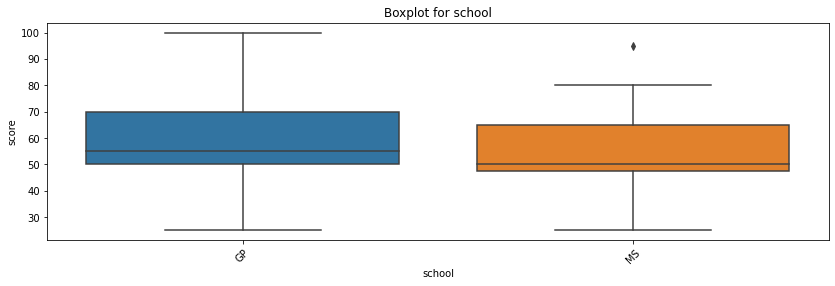

Статистически значимые различия для колонки school не найдены


In [47]:
'''Проверка параметра school (школа посещения)'''
display('Количественные показатели:', stud_math.school.value_counts())
data_boxplot('school')
data_stat_dif('school')
#display('Статистические показатели:', stud_math[stud_math.school == 'MS']['score'].describe())
#stud_math[stud_math.school == 'MS']['score'].value_counts()

### Выводы: 
#### 1. Подавляющее число учеников (почти 88%), участвующих в анализе, посещают одну школу.
#### 2. Данные полные, дополнительной обработки данных проводить не надо.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр school можно исключить из дальнейшего анализа (построения модели).

###  

'Количественные показатели:'

F    161
M    153
Name: sex, dtype: int64

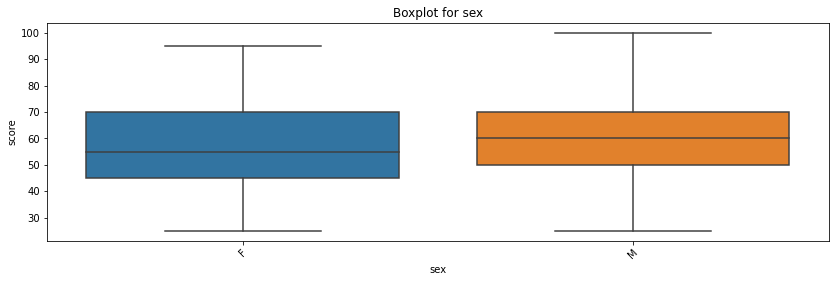

Найдены статистически значимые различия для колонки sex


In [33]:
'''Проверка параметра sex (пол учеников)'''
display('Количественные показатели:', stud_math.sex.value_counts())
data_boxplot('sex')
data_stat_dif('sex')

### Выводы: 
#### 1. Учеников женского и мужского пола примерно одинаковое количество.
#### 2. Данные полные, выбросы отсутствуют, дополнительной обработки данных проводить не надо.
### 3. Найдены статистически значимые различия данных для оценки влияния успеваемости, по этой причине параметр sex должен быть использован для дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 13


'Количественные показатели:'

U    235
R     66
Name: address, dtype: int64

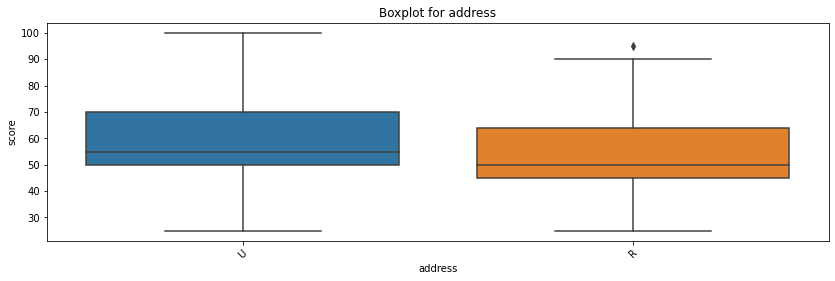

Найдены статистически значимые различия для колонки address


In [34]:
'''Проверка параметра address (место проживания учеников)'''
print('Количество пропущенных значений:',stud_math.address.isnull().sum())
display('Количественные показатели:', stud_math.address.value_counts())
data_boxplot('address')
data_stat_dif('address')

### Выводы: 
#### 1. Три четверти учеников (78%) живет в городе. 
#### 2. Данные достаточно полные, пропущенных значений 13, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
### 3. Найдены статистически значимые различия данных для оценки влияния успеваемости, по этой причине параметр address должен быть использован для дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 18


'Количественные показатели:'

GT3    207
LE3     89
Name: fam_size, dtype: int64

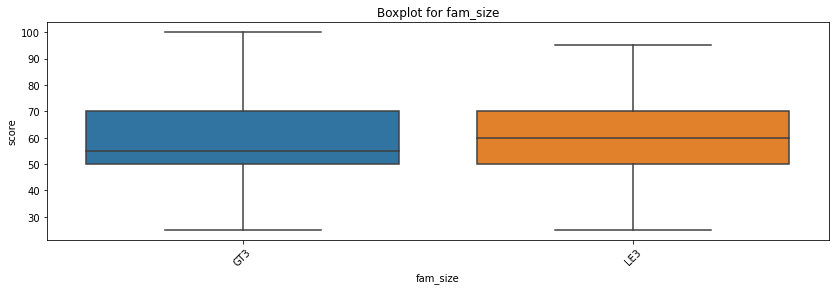

Статистически значимые различия для колонки fam_size не найдены


In [35]:
'''Проверка параметра famsize (размер семьи)'''
print('Количество пропущенных значений:',stud_math.fam_size.isnull().sum())
display('Количественные показатели:', stud_math.fam_size.value_counts())
data_boxplot('fam_size')
data_stat_dif('fam_size')

### Выводы: 
#### 1. Число семей с количеством членов больше трех больше почти в 2,5 раза.
#### 2. Данные достаточно полные, пропущенных значений 18, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр fam_size можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 32


'Количественные показатели:'

T    254
A     28
Name: p_status, dtype: int64

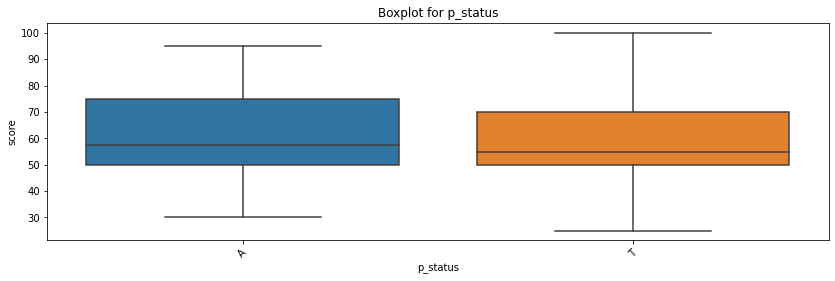

Статистически значимые различия для колонки p_status не найдены


In [36]:
'''Проверка параметра pstatus (статус совместного проживания родителей)'''
print('Количество пропущенных значений:',stud_math.p_status.isnull().sum())
display('Количественные показатели:', stud_math.p_status.value_counts())
data_boxplot('p_status')
data_stat_dif('p_status')

### Выводы: 
#### 1. Практически все семьи полные (почти 90%).
#### 2. Пропущенных значений 32, заполнить их не представляется возможным ввиду большого количества и отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр p_status можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 14


'Количественные показатели:'

other       102
services     79
teacher      46
at_home      44
health       29
Name: m_job, dtype: int64

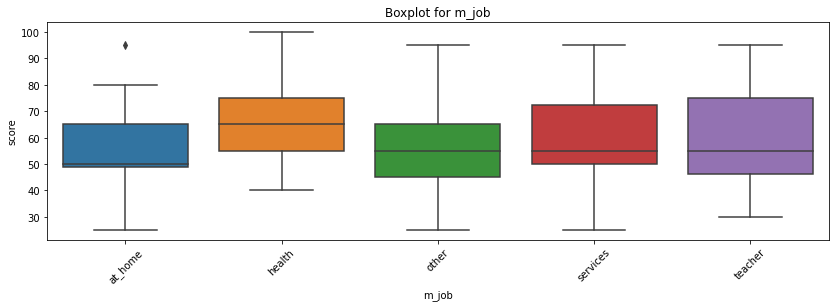

Найдены статистически значимые различия для колонки m_job


In [38]:
'''Проверка параметра m_job (работа матери)'''
print('Количество пропущенных значений:',stud_math.m_job.isnull().sum())
display('Количественные показатели:', stud_math.m_job.value_counts())
data_boxplot('m_job')
data_stat_dif('m_job')

### Выводы: 
#### 1. Работа матерей распределена достаточно равномерно, немного больше работает в сфере услуг.
#### 2. Пропущенных значений 14, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
### 3. Найдены статистически значимые различия данных для оценки влияния успеваемости, по этой причине параметр m_job должен быть использован для дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 28


'Количественные показатели:'

other       159
services     78
teacher      22
at_home      14
health       13
Name: f_job, dtype: int64

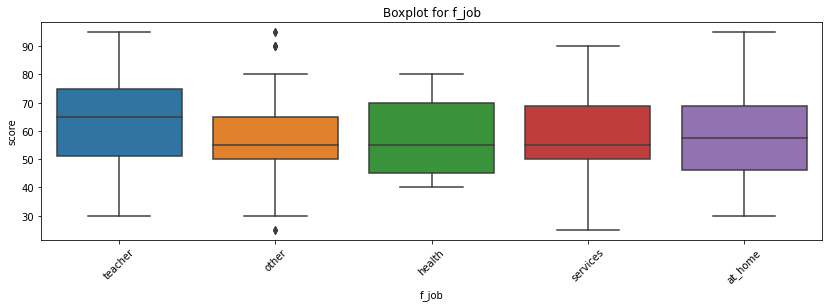

Статистически значимые различия для колонки f_job не найдены


In [48]:
'''Проверка параметра f_job (работа отца)'''
print('Количество пропущенных значений:',stud_math.f_job.isnull().sum())
display('Количественные показатели:', stud_math.f_job.value_counts())
data_boxplot('f_job')
data_stat_dif('f_job')

### Выводы: 
#### 1. Основное количество отцов работает в сфере услуг и по другим специальностям (83%).
#### 2. Пропущенных значений 28, заполнить их не представляется возможным ввиду большого количества и отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр f_job можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 15


'Количественные показатели:'

course        110
reputation     84
home           75
other          30
Name: reason, dtype: int64

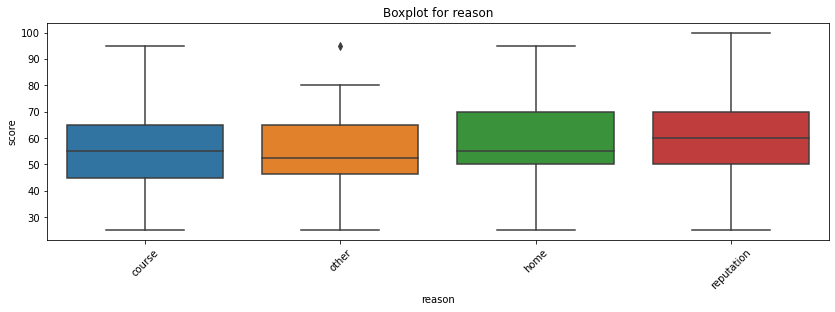

Статистически значимые различия для колонки reason не найдены


In [49]:
'''Проверка параметра reason (причина выбора школы)'''
print('Количество пропущенных значений:',stud_math.reason.isnull().sum())
display('Количественные показатели:', stud_math.reason.value_counts())
data_boxplot('reason')
data_stat_dif('reason')

### Выводы: 
#### 1. Основные причины выбора школы распределны примерно равномерно, однако образовательная программа является приоритетной (наверное, по этой причине школа "GP" пользуется бОльшей популярностью).
#### 2. Пропущенных значений 15, заполнить их не представляется возможным ввиду  отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр reason можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 28


'Количественные показатели:'

mother    198
father     74
other      14
Name: guardian, dtype: int64

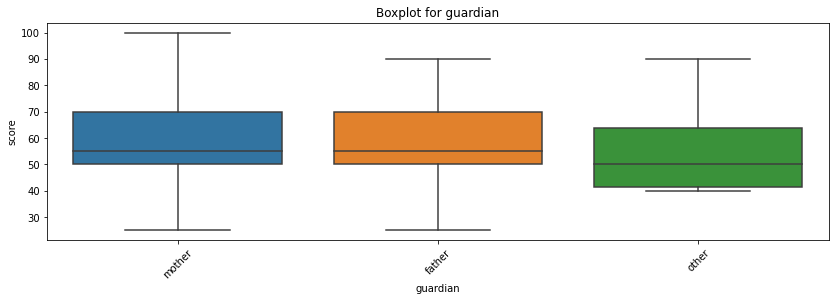

Статистически значимые различия для колонки guardian не найдены


In [37]:
'''Проверка параметра guardian (опекунство)'''
print('Количество пропущенных значений:',stud_math.guardian.isnull().sum())
display('Количественные показатели:', stud_math.guardian.value_counts())
data_boxplot('guardian')
data_stat_dif('guardian')

### Выводы: 
#### 1. В подавляющем числе семей (почти 70%) основную помощь учащемуся оказывают матери, и только в 26% - отцы.
#### 2. Пропущенных значений 28, заполнить их не представляется возможным ввиду большого количества и отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр guardian можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 9


'Количественные показатели:'

no     262
yes     43
Name: school_sup, dtype: int64

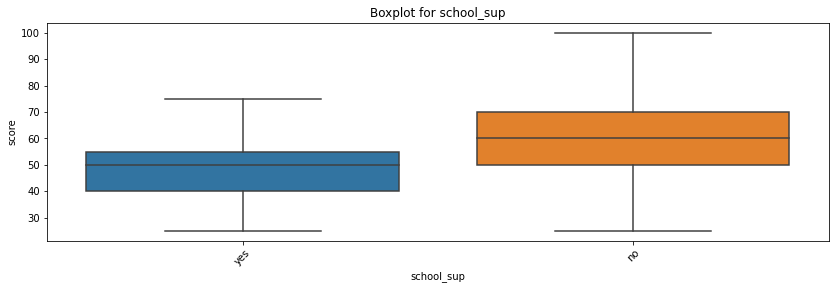

Найдены статистически значимые различия для колонки school_sup


In [50]:
'''Проверка параметра school_sup (дополнительная образовательная поддержка)'''
print('Количество пропущенных значений:',stud_math.school_sup.isnull().sum())
display('Количественные показатели:', stud_math.school_sup.value_counts())
data_boxplot('school_sup')
data_stat_dif('school_sup')

### Выводы: 
#### 1. Основное количество учеников (86%) учатся без дополнительной образовательной поддержки со стороны школы.
#### 2. Данные достаточно полные, пропущенных значений всего 9, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
### 3. Найдены статистически значимые различия данных для оценки влияния успеваемости, по этой причине параметр school_sup должен быть использован для дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 30


'Количественные показатели:'

yes    174
no     110
Name: fam_sup, dtype: int64

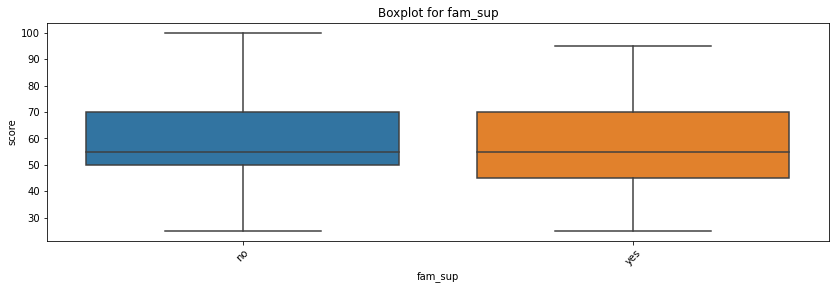

Статистически значимые различия для колонки fam_sup не найдены


In [51]:
'''Проверка параметра fam_sup (семейная образовательная поддержка)'''
print('Количество пропущенных значений:',stud_math.fam_sup.isnull().sum())
display('Количественные показатели:', stud_math.fam_sup.value_counts())
data_boxplot('fam_sup')
data_stat_dif('fam_sup')

### Выводы: 
#### 1. Более половины учеников обращаются за помощью в учебе к семье.
#### 2. Пропущенных значений 30, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр fam_sup можно исключить из дальнейшего анализа (построения модели).
###  

Количество пропущенных значений: 33


'Количественные показатели:'

no     152
yes    129
Name: paid, dtype: int64

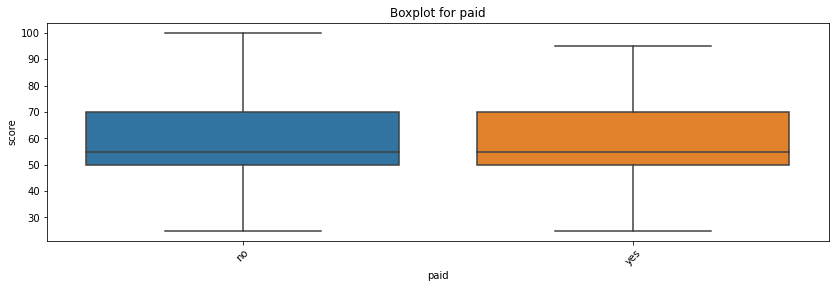

Статистически значимые различия для колонки paid не найдены


In [52]:
'''Проверка параметра paid (дополнительные платные занятия по математике)'''
print('Количество пропущенных значений:',stud_math.paid.isnull().sum())
display('Количественные показатели:', stud_math.paid.value_counts())
data_boxplot('paid')
data_stat_dif('paid')

### Выводы: 
#### 1. Чуть более половины учеников не пользуются дополнительными платными уроками по математике, справляются сами.
#### 2. Пропущенных значений 33, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр paid можно исключить из дальнейшего анализа (построения модели)
###  

Количество пропущенных значений: 12


'Количественные показатели:'

yes    158
no     144
Name: activities, dtype: int64

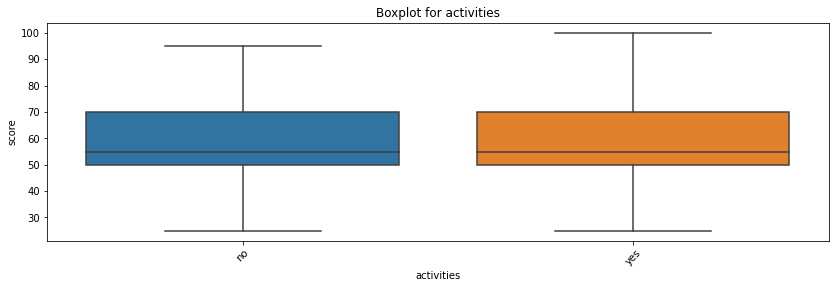

Статистически значимые различия для колонки activities не найдены


In [53]:
'''Проверка параметра activities (дополнительные внеучебные занятия)'''
print('Количество пропущенных значений:',stud_math.activities.isnull().sum())
display('Количественные показатели:', stud_math.activities.value_counts())
data_boxplot('activities')
data_stat_dif('activities')

### Выводы: 
#### 1. Дополнительные  учебные занятия посещает чуть больше половины учеников.
#### 2. Данные достаточно полные, пропущенных значений всего 12, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр activities можно исключить из дальнейшего анализа (построения модели)
###  

Количество пропущенных значений: 12


'Количественные показатели:'

yes    242
no      60
Name: nursery, dtype: int64

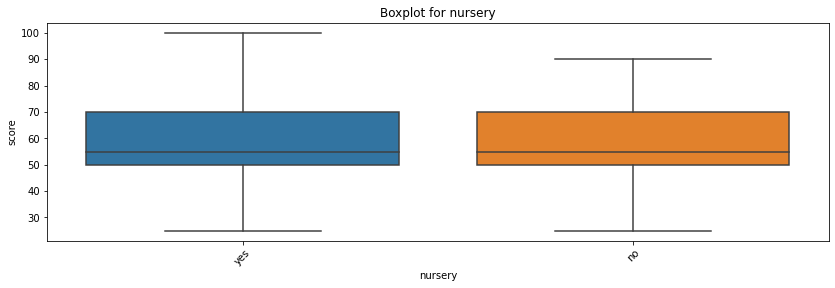

Статистически значимые различия для колонки nursery не найдены


In [54]:
'''Проверка параметра nursery (посещал детский сад)'''
print('Количество пропущенных значений:',stud_math.nursery.isnull().sum())
display('Количественные показатели:', stud_math.nursery.value_counts())
data_boxplot('nursery')
data_stat_dif('nursery')

### Выводы: 
#### 1. 80% учеников посещали перед школой детский сад.
#### 2. Данные достаточно полные, пропущенных значений всего 12, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр nursery можно исключить из дальнейшего анализа (построения модели)
###  

Количество пропущенных значений: 16


'Количественные показатели:'

yes    288
no      10
Name: higher, dtype: int64

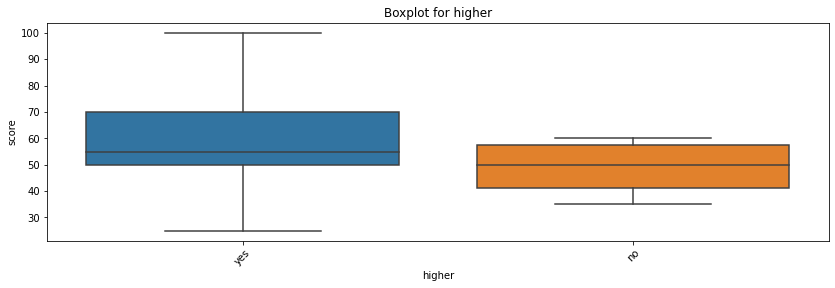

Статистически значимые различия для колонки higher не найдены


In [55]:
'''Проверка параметра higher (хочет получить высшее образование)'''
print('Количество пропущенных значений:',stud_math.higher.isnull().sum())
display('Количественные показатели:', stud_math.higher.value_counts())
data_boxplot('higher')
data_stat_dif('higher')

### Выводы: 
#### 1. Подавляющее число учеников (96%) хотят получить высшее образование.
#### 2. Данные достаточно полные, пропущенных значений всего 16, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр higher можно исключить из дальнейшего анализа (построения модели)
###  

Количество пропущенных значений: 26


'Количественные показатели:'

yes    241
no      47
Name: internet, dtype: int64

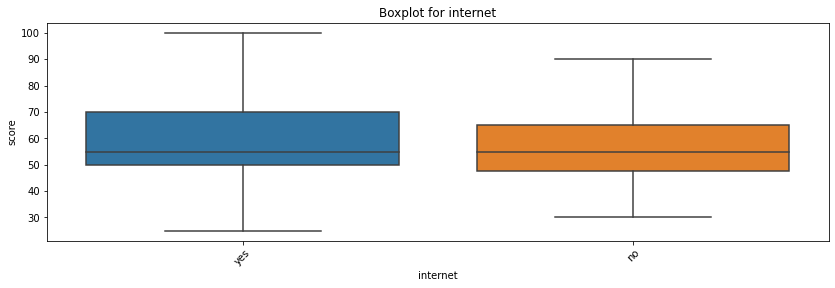

Статистически значимые различия для колонки internet не найдены


In [56]:
'''Проверка параметра internet (наличие интернета дома)'''
print('Количество пропущенных значений:',stud_math.internet.isnull().sum())
display('Количественные показатели:', stud_math.internet.value_counts())
data_boxplot('internet')
data_stat_dif('internet')

### Выводы: 
#### 1. У большинства учеников (84%) установлен дома интернет (наверное, данный датасет старый, тогда интернет был ещё не у всех)
#### 2. Данные достаточно полные, пропущенных значений 26, заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр internet можно исключить из дальнейшего анализа (построения модели)
###  

Количество пропущенных значений: 28


'Количественные показатели:'

no     197
yes     89
Name: romantic, dtype: int64

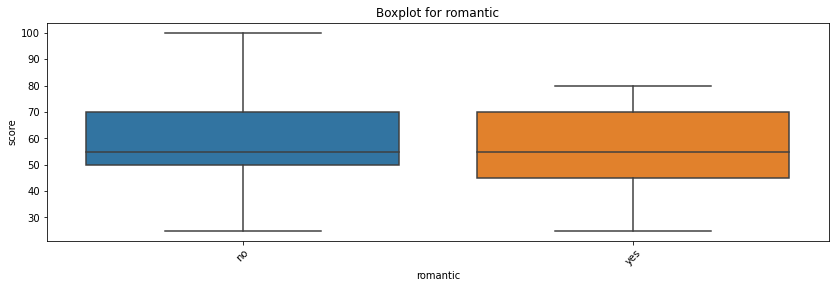

Статистически значимые различия для колонки romantic не найдены


In [57]:
'''Проверка параметра romantic (в романтических отношениях)'''
print('Количество пропущенных значений:',stud_math.romantic.isnull().sum())
display('Количественные показатели:', stud_math.romantic.value_counts())
data_boxplot('romantic')
data_stat_dif('romantic')

### Выводы: 
#### 1. Замечательный подростковый период: ну как можно жить без влюблённости в кого-нибудь (69%)?
#### 2. Данные достаточно полные, пропущенных значений 28 (не все готовы признаться в этом), заполнить их не представляется возможным ввиду отсутствия информации, дополнительной обработки данных не требуется.
#### 3. Статистически значимые различия данных для оценки влияния успеваемости не найдены, поэтому параметр romantic можно исключить из дальнейшего анализа (построения модели)
###  

# УФФФ, я сделал это!!!!!

## Таким образом, для дальнейшего анализа и построения модели мы оставляем следующие параметры:
## - из количественных: age, m_edu, f_edu, study_time, failures, go_out, absences
## - из номинативных: sex, address, m_job, school_sup

In [58]:
stud_math_for_model = stud_math.loc[:, ['age', 'm_edu', 'f_edu', 'study_time', 'failures', 'go_out', 
                                        'absences', 'sex', 'address', 'm_job', 'school_sup']]
stud_math_for_model.head()

,age,m_edu,f_edu,study_time,failures,go_out,absences,sex,address,m_job,school_sup
0,18.00,4.00,4.00,2.00,0.00,4.00,6.00,F,U,at_home,yes
1,17.00,1.00,1.00,2.00,0.00,3.00,4.00,F,U,at_home,no
2,15.00,1.00,1.00,2.00,3.00,2.00,10.00,F,U,at_home,yes
3,15.00,4.00,2.00,3.00,0.00,2.00,2.00,F,U,health,no
4,16.00,3.00,3.00,2.00,0.00,2.00,4.00,F,U,other,no
